Это небольшое приложение к моему посту на kochanoff.com про игру в рулетку - простенький код, таблички и графики

In [355]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Напишем функцию, которая считает вероятность k успехов в n испытаниях при p вероятности успеха в 1 испытании

In [20]:
def bernulli(p,k,n):
    q = 1 - p
    return (np.math.factorial(n)/(np.math.factorial(k)*np.math.factorial((n - k)))) * p**k * q**(n-k)

проверим её в деле и получим вероятность ровно 1 выигрыша в рулетку в 100 играх...

In [22]:
bernulli(1/37,1,100)

0.17938047482178854

...в 37 играх. Смотрите, тут она выше! Оно и понятно, если играем 100 раз, то более веротяно уже получить хотя бы 2-3 выигрыша, а не один единственный 

In [135]:
bernulli(1/37,1,37)

0.37293054960162375

теперь напишем функцию, которая посчитает нам вероятность ХОТЯ БЫ k выигрышей в n исптыаниях. Для этого нам понадобится сложить вероятность k, k+1, k+2 и так далее, до n успехов в n испытаниях

In [334]:
def bernulli_at_least_k(p,k,n):
    sum = 0
    for _ in range(k,n+1):
        sum += bernulli(p,_,n)
    return(sum)

Вероятность хотя бы одного успеха в рулетке в 37 играх

In [336]:
bernulli_at_least_k(1/37,1,37)

0.6371486544416651

Мы хотим получить значение функции bernulli_at_least_k для значений от 1 до 200. Сделаю это через простенькую функцию-декторатор, в которую будем передваь разные значения игр

In [53]:
def decorator_bernulli_at_least_k(x):
    return bernulli_at_least_k(1/37,1,x)

Заданим массив от 0 до 199, с 0, потому что он нам понадобится позже

In [341]:
x = np.arange(0,200)

In [342]:
x

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

в res запишем массив вероятностей хотя бы одного выигрыша при числе игр от 1 до 200

In [262]:
res = np.array(list(map(decorator_bernulli_at_least_k,x+1)))

In [344]:
res[:10]

array([0.02702703, 0.05332359, 0.07890944, 0.10380378, 0.1280253 ,
       0.15159219, 0.17452213, 0.19683234, 0.21853957, 0.23966013])

посмотрим, с какого момента у нас начинается "верняк" с вероятностью больше 95%. Cо 107 игры, получается

In [264]:
np.where(res>=0.949)

(array([108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
        121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
        134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
        147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
        160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,
        173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185,
        186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198,
        199]),)

нарисуем полученные вероятности на графике, прямыми линиями отметим 37 игру и 95% вероятность

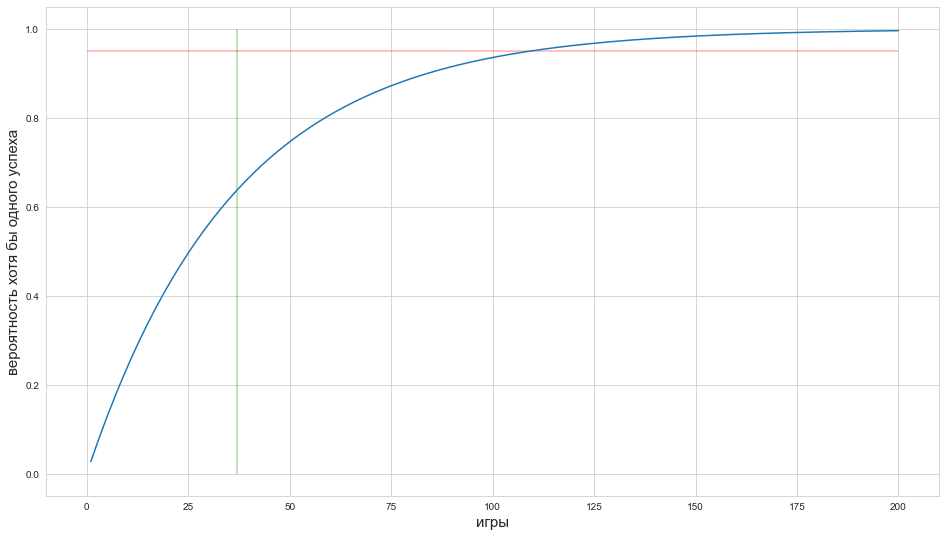

In [356]:
sns.set_style("whitegrid")
plt.figure(figsize = (16,9))
plt.plot(x+1,res)
plt.hlines(0.95, 0,200, color = 'red', alpha = 0.33)
plt.vlines(37, 0,1, color = 'green', alpha = 0.33)
plt.xlabel('игры', size = 15)
plt.ylabel('вероятность хотя бы одного успеха', size = 15)
plt.savefig('success.png')

Теперь перейдем к рассчету "ставок". double - массив двоек, которые возведем в степень x

In [369]:
double = np.full(200,2, dtype='double') #double - потому что на больших степенях двойки numpy инт-ов уже не хватает

In [270]:
alt = double ** x

Создадим красивую табличку c результатами наших вычислений

In [370]:
result = pd.DataFrame(np.vstack((x+1,alt,res)).T, columns = ['round', 'amount','win_proba'])

In [373]:
result['sum'] = result['amount'].cumsum() #накопленная сумма

In [372]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) #чтобы цифры выглядели по-человечески
#pd.reset_option('display.float_format') #чтобы вернуть все взад

In [368]:
result.head(n=40)

,round,amount,win_proba,sum
0,1.000,1.000,0.027,1.000
1,2.000,2.000,0.053,3.000
2,3.000,4.000,0.079,7.000
3,4.000,8.000,0.104,15.000
4,5.000,16.000,0.128,31.000
5,6.000,32.000,0.152,63.000
6,7.000,64.000,0.175,127.000
7,8.000,128.000,0.197,255.000
8,9.000,256.000,0.219,511.000
9,10.000,512.000,0.240,1023.000


Напоследок посмотрим, что там в 107 ячейке, после которой уже 95% и выше успех

In [377]:
result.iloc[107,]

round                                     108.000
amount      162259276829213363391578010288128.000
win_proba                                   0.948
sum         324518553658426726783156020576256.000
Name: 107, dtype: float64